In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics  import mode
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import mean_squared_error, recall_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

In [2]:
train = pd.read_csv(r'C:\Users\neelambuj.chaturvedi.ADRA\Desktop\All in one\Datasets\Data Supermacy\train_jqd04QH.csv')
test = pd.read_csv(r'C:\Users\neelambuj.chaturvedi.ADRA\Desktop\All in one\Datasets\Data Supermacy\test_GYi4Gz5.csv')

In [3]:
print(train.head())
print(test.head())

   enrollee_id      city  city_development_index gender  \
0        23798  city_149                   0.689   Male   
1        29166   city_83                   0.923   Male   
2           46   city_16                   0.910    NaN   
3        18527   city_64                   0.666   Male   
4        21751  city_100                   0.887    NaN   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4   No relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM          3      100-500         Pvt Ltd            1   
1             STEM         14          <10  Funded Startup            1   
2             STEM     

In [4]:
numeric = train._get_numeric_data()
char = train.select_dtypes(include = ['object'])
print("Numeric DATA")
print(numeric.head())
print("Character data")
print(char.head())

Numeric DATA
   enrollee_id  city_development_index  training_hours  target
0        23798                   0.689             106       0
1        29166                   0.923              69       0
2           46                   0.910               4       0
3        18527                   0.666              26       0
4        21751                   0.887              88       1
Character data
       city gender      relevent_experience enrolled_university  \
0  city_149   Male  Has relevent experience       no_enrollment   
1   city_83   Male  Has relevent experience       no_enrollment   
2   city_16    NaN  Has relevent experience       no_enrollment   
3   city_64   Male  Has relevent experience       no_enrollment   
4  city_100    NaN   No relevent experience       no_enrollment   

  education_level major_discipline experience company_size    company_type  \
0        Graduate             STEM          3      100-500         Pvt Ltd   
1        Graduate             STEM 

In [5]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [6]:
target = train.target
target = pd.DataFrame(target, columns =['target'])
target.columns[0]

'target'

Tabular represenattion of categorical variables
target       0    1
city               
city_1      25    2
city_10     86    9
city_100   227   44
city_101    36    8
city_102   277   36
city_103  3795  563
city_104   297   21
city_105    80    7
city_106     6    2
city_107     3    1
city_109     6    2
city_11    114   36
city_111     3    0
city_114  1336  136
city_115    37   13
city_116   119   12
city_117     9    3
city_118    21    8
city_12     12    2
city_120     5    1
city_121     3    0
city_123    66   12
city_126    14    5
city_127    12    1
city_128    45   17
city_129     3    0
city_13     48    5
city_131     6    1
city_133     9    2
city_134    41    7
...        ...  ...
city_64    107   12
city_65    168   20
city_67    406   49
city_69     18    2
city_7      22    2
city_70     30    9
city_71    250   31
city_72     20    2
city_73    226   38
city_74     56   10
city_75    300   32
city_76     40    9
city_77     37    1
city_78     15    5
city_79     

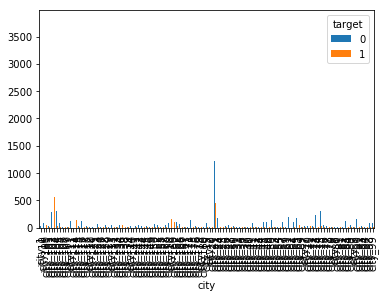

Tabular represenattion of categorical variables
target      0     1
gender             
Female   1009   179
Male    11306  1578
Other     160    29
Barplots


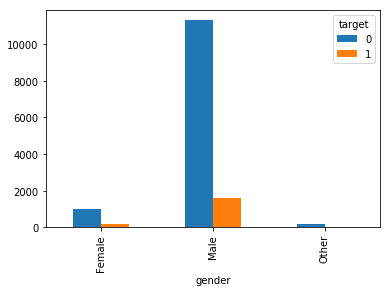

Tabular represenattion of categorical variables
target                       0     1
relevent_experience                 
Has relevent experience  12002  1594
No relevent experience    3932   831
Barplots


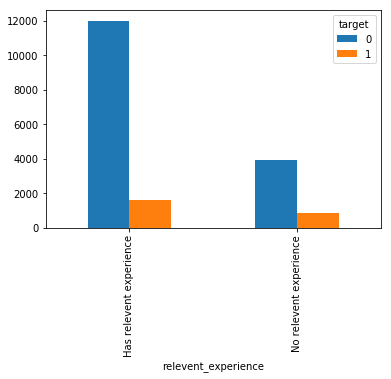

Tabular represenattion of categorical variables
target                   0     1
enrolled_university             
Full time course      2580   607
Part time course       997   174
no_enrollment        12071  1588
Barplots


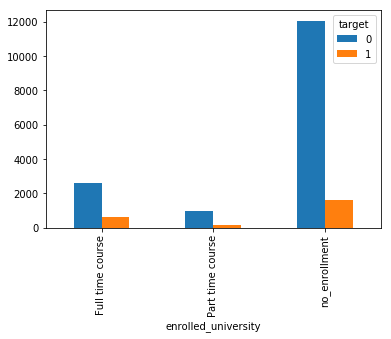

Tabular represenattion of categorical variables
target              0     1
education_level            
Graduate         9237  1532
High School      1791   241
Masters          3806   513
Phd               406    53
Primary School    298    25
Barplots


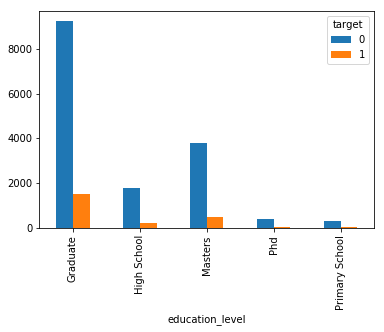

Tabular represenattion of categorical variables
target                0     1
major_discipline             
Arts                214    25
Business Degree     268    39
Humanities          595    93
No Major            186    20
Other               306    37
STEM              11861  1877
Barplots


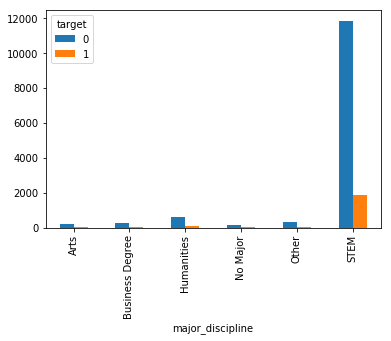

Tabular represenattion of categorical variables
target         0    1
experience           
1            344  108
10           847  120
11           584   83
12           445   52
13           364   48
14           527   75
15           618   77
16           492   57
17           313   34
18           260   26
19           275   33
2            821  171
20           130   16
3            968  191
4           1039  211
5           1125  184
6            972  153
7            811  139
8            669   86
9            861  118
<1           315  101
>20         3107  330
Barplots


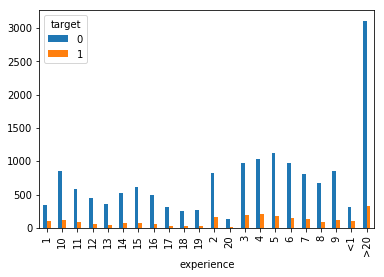

Tabular represenattion of categorical variables
target           0    1
company_size           
10/49         1269  197
100-500       2418  280
1000-4999     1246  153
10000+        1797  247
50-99         2807  313
500-999        797  105
5000-9999      517   74
<10           1214  146
Barplots


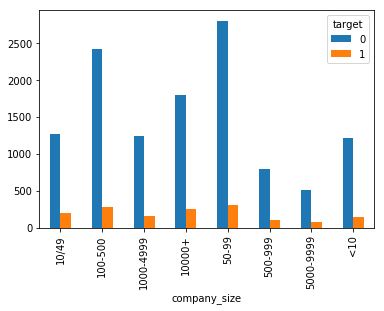

Tabular represenattion of categorical variables
target                  0     1
company_type                   
Early Stage Startup   508    74
Funded Startup        942    96
NGO                   465    69
Other                 100    19
Public Sector         844   152
Pvt Ltd              8954  1097
Barplots


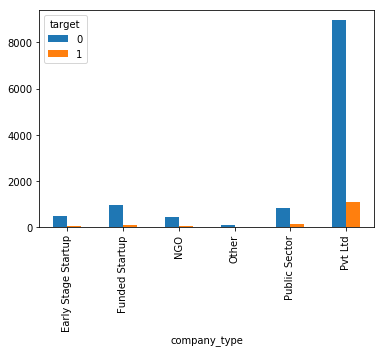

Tabular represenattion of categorical variables
target           0     1
last_new_job            
1             6549  1018
2             2446   389
3              897   130
4              891   147
>4            2978   361
never         1876   310
Barplots


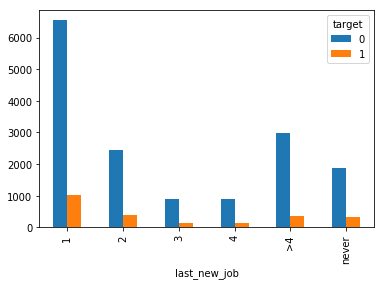

In [7]:
def univariate(df, target):
    c = target.columns[0]
    for col in df.columns:
        if df[col].dtypes == 'object':
            print("Tabular represenattion of categorical variables")
            sec = pd.crosstab(index= df[col], columns = target[c])
            print(sec)
            print("Barplots")
            sec.plot(kind = 'bar')
            plt.show()
        else:

            print("The Distplots of each variable")
            sns.distplot(df[col])

univariate(char, target)

In [8]:
char['gender'] = char['gender'].fillna('Male')
char['enrolled_university'] =char['enrolled_university'].fillna('no_enrollment')
char['education_level'] = char['education_level'].fillna('Graduate')
char['major_discipline'] = char['major_discipline'].fillna('STEM')
char['experience'] = char['experience'].fillna('>20')
char['company_size'] = char['company_size'].fillna('50-99')
char['company_type'] = char['company_type'].fillna('Pvt Ltd')
char['last_new_job'] = char['last_new_job'].fillna('1')

for col in char.columns:
    if char[col].count() == len(train):
        Lab = LabelEncoder()
        Lab.fit(char[col])
        char[col] = Lab.fit_transform(char[col])        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [9]:
numeric = numeric.drop(['enrollee_id', 'target'], axis =1)

In [10]:
char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 10 columns):
city                   18359 non-null int64
gender                 18359 non-null int64
relevent_experience    18359 non-null int64
enrolled_university    18359 non-null int64
education_level        18359 non-null int64
major_discipline       18359 non-null int64
experience             18359 non-null int64
company_size           18359 non-null int64
company_type           18359 non-null int64
last_new_job           18359 non-null int64
dtypes: int64(10)
memory usage: 1.4 MB


In [11]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 2 columns):
city_development_index    18359 non-null float64
training_hours            18359 non-null int64
dtypes: float64(1), int64(1)
memory usage: 286.9 KB


In [12]:
char.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,41,1,0,2,0,5,13,1,5,0
1,112,1,0,2,0,5,5,7,1,0
2,48,1,0,2,0,5,16,4,4,1
3,93,1,0,2,0,5,5,4,5,0
4,2,1,1,2,2,5,18,4,5,1


In [13]:
numeric.head()


,city_development_index,training_hours
0,0.689,106
1,0.923,69
2,0.910,4
3,0.666,26
4,0.887,88


In [14]:
tnumeric = test._get_numeric_data()
tchar = test.select_dtypes(include = ['object'])

In [15]:
print(tnumeric.head())
print(tchar.head())

   enrollee_id  city_development_index  training_hours
0        16548                   0.448              15
1        12036                   0.939              94
2        11061                   0.920              17
3         5032                   0.924              76
4        17599                   0.830              65
       city gender      relevent_experience enrolled_university  \
0   city_33    NaN   No relevent experience    Full time course   
1   city_28   Male   No relevent experience       no_enrollment   
2  city_103   Male   No relevent experience    Full time course   
3  city_104   Male   No relevent experience       no_enrollment   
4   city_77   Male  Has relevent experience       no_enrollment   

  education_level major_discipline experience company_size   company_type  \
0        Graduate             STEM         <1    1000-4999  Public Sector   
1        Graduate             STEM        >20        50-99        Pvt Ltd   
2        Graduate             STEM  

In [16]:
tnumeirc = tnumeric.drop(['enrollee_id'], axis = 1)

In [17]:
tchar['gender'] = tchar['gender'].fillna('Male')
tchar['enrolled_university'] = tchar['enrolled_university'].fillna('no_enrollment')
tchar['education_level'] = tchar['education_level'].fillna('Graduate')
tchar['major_discipline'] = tchar['major_discipline'].fillna('STEM')
tchar['experience'] = tchar['experience'].fillna('>20')
tchar['company_size'] = tchar['company_size'].fillna('50-99')
tchar['company_type'] = tchar['company_type'].fillna('Pvt Ltd')
tchar['last_new_job'] = tchar['last_new_job'].fillna('1')

for col in tchar.columns:
    if tchar[col].count() == len(test):
        Lab = LabelEncoder()
        Lab.fit(tchar[col])
        tchar[col] = Lab.fit_transform(tchar[col])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [20]:
predictors.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours
0,41,1,0,2,0,5,13,1,5,0,0.689,106
1,112,1,0,2,0,5,5,7,1,0,0.923,69
2,48,1,0,2,0,5,16,4,4,1,0.910,4
3,93,1,0,2,0,5,5,4,5,0,0.666,26
4,2,1,1,2,2,5,18,4,5,1,0.887,88


In [19]:
predictors = pd.concat([char, numeric], axis =1)
target = train.target
target = pd.DataFrame(target, columns = ['target'])
test_new = pd.concat([tchar, tnumeric], axis = 1)
test_new = test_new.drop(['enrollee_id'], axis = 1)

In [33]:
predi = predictors.drop(['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type'], axis =1)
test_nn = test_new.drop([ 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type'], axis =1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(predi, target, test_size= 0.3, random_state =1)

In [35]:
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_, y_train_ = sm.fit_sample(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
ad  = ADASYN(random_state = 21)
X_tra, y_tra  = ad.fit_sample(X_train, y_train.values.ravel())

In [148]:
df = SMOTETomek(random_state = 42)
X_t, y_t = df.fit_sample(X_train, y_train.values.ravel())

## Model --- RandomizedSearchCV

In [74]:
rfc = RandomForestClassifier(verbose = True)
params = {'n_estimators': [200, 300, 400, 500],
         'criterion': ['gini', 'entropy'],
         'max_depth': [6,7,8],
         'min_samples_split': [3,4,5,6,7,8],
         'min_samples_leaf': [3,4,5,2],
         }

grid = RandomizedSearchCV(estimator = rfc, param_distributions = params, scoring = 'roc_auc', verbose = True, cv = 6, n_iter =15)

In [75]:
grid.fit(X_train_, y_train_)
print(grid.best_params_)

Fitting 6 folds for each of 15 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 8, 'criterion': 'gini'}


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    5.1s finished


## Model--- RandomForestClassifier

In [152]:
model = RandomForestClassifier(n_estimators = 750 , criterion = 'entropy', max_depth = 3)
model.fit(X_t, y_t)
print(model.score(X_t, y_t))
print(recall_score(y_test, model.predict(xx)))

0.6907468294974166
0.49445983379501385


In [134]:
predc = model.predict(tt)
pred = pd.DataFrame(predc)
#pred.to_csv('win33.csv')

In [37]:
predi.head()

,city,experience,last_new_job,city_development_index,training_hours
0,41,13,0,0.689,106
1,112,5,0,0.923,69
2,48,16,1,0.910,4
3,93,5,0,0.666,26
4,2,18,1,0.887,88


## Model--- RecursiveFeatureElimination

In [30]:
rfe = RFE(model1, 4)
rfe.fit(X_train_, y_train_)
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False False  True False False False  True  True]
[1 9 8 6 4 7 1 3 5 2 1 1]


# Model---- Extreme Gradient Boosting

In [25]:
gbm = xgb.XGBClassifier(verbose = True)
param_grid = {'n_estimators': [200, 300, 400, 500],
             'max_depth': [2,3,4,5],
             'learning_rate': [0.2,0.3,0.01,0.02, 0.03],
             'min_child_weight': [3,4,5,6,7],
             'reg_lambda': [0.2, 0.3, 0.4 , 0.02, 0.04, 1, 2, 0.5]}
random = RandomizedSearchCV(estimator = gbm, param_distributions = param_grid, cv = 6, n_iter =20, verbose =True, scoring = 'roc_auc')

In [26]:
random.fit(X_train_ , y_train_)
print(random.best_params_)

Fitting 6 folds for each of 20 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  8.5min finished


{'reg_lambda': 0.3, 'n_estimators': 500, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.2}


In [123]:
model1 = xgb.XGBClassifier(n_estimators =  800, learning_rate=  0.3, max_depth = 4)
model1.fit(X_tra, y_tra)
print(model1.score(X_tra, y_tra))
print(recall_score(y_test, model1.predict(xx)))

0.9043757240887621
0.060941828254847646


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [135]:
predic1 = model1.predict(tt)
predi1 = pd.DataFrame(predi1)
#predi1.to_csv('win211.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [130]:
lr = LogisticRegression()
lr.fit(X_tra, y_tra)
print(lr.score(X_tra, y_tra))
print(recall_score(y_test, lr.predict(xx)))

0.5758399429640852
0.4376731301939058


In [136]:
prec = lr.predict(tt)
pre = pd.DataFrame(pre)
#pre.to_csv('win21.csv')

In [133]:
?LogisticRegression()

In [141]:
nb = GaussianNB()
nb.fit(X_tra, y_tra)
print(nb.score(X_tra, y_tra))
print(recall_score(y_test, nb.predict(xx)))

0.5804741110417966
0.40166204986149584


In [142]:
pr = nb.predict(tt)

In [144]:
final_pred = [mode([prec[i], pr[i], predc[i]]) for i in range(len(tt))]
final_pred = pd.DataFrame(final_pred)
final_pred.to_csv('Win2222.csv')

In [ ]:
?xgb.XGBClassifier()

In [ ]:
?GridSearchCV()

In [41]:
X_test.shape
xx = np.asarray(X_test).reshape(5508, 5)

In [ ]:
len(X_test)

In [45]:
test_nn.shape

(15021, 5)

In [47]:
tt = np.asarray(test_nn).reshape(15021, 5)